# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/blastchar/telco-customer-churn

   **Telco Customer Churn**
   *(Focused customer retention programs)*

   Context
   "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

   Content
   Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

   The data set includes information about:

   Customers who left within the last month – the column is called Churn
   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
   Demographic info about customers – gender, age range, and if they have partners and dependents


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Konfigurasi visualisasi
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Lokasi dataset (sesuaikan jika path berbeda)
# Note: Menggunakan relative path agar kompatibel dengan struktur folder submission
DATA_PATH = '../data_raw/data_telco.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print(f"[INFO] Dataset berhasil dimuat with shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"[ERROR] File tidak ditemukan di {DATA_PATH}. Pastikan file csv ada di folder data_raw.")

[INFO] Dataset berhasil dimuat with shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

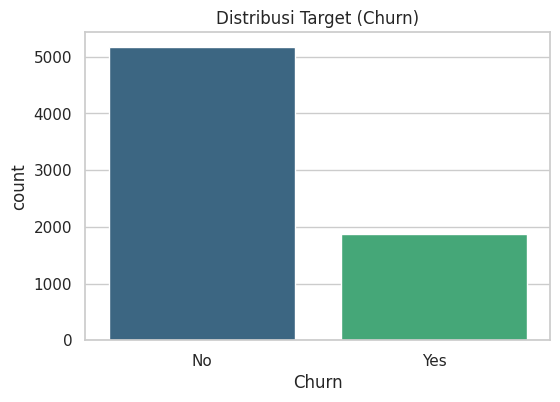

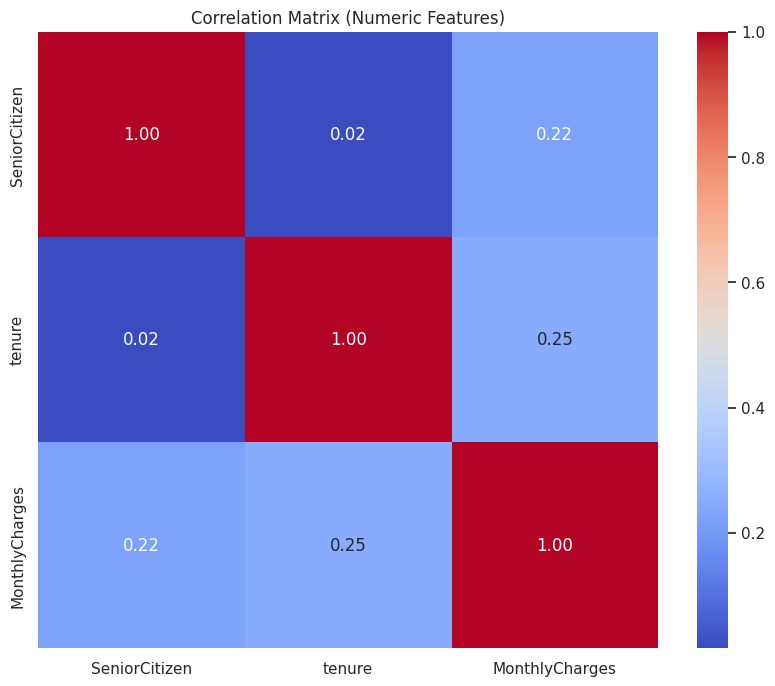

In [3]:
# 1. Cek Informasi Umum & Tipe Data
print("--- Info Dataset ---")
df.info()

# 2. Cek Missing Values (Awal)
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 3. Visualisasi Target (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Target (Churn)')
plt.show()

# 4. Korelasi Variabel Numerik
# Note: TotalCharges masih object (string), jadi belum masuk heatmap di sini.
# perbaiki di tahap Preprocessing.
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# --- A. Pembersihan Data (Data Cleaning) ---

# 1. Menghapus kolom ID yang tidak relevan
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    print("[INFO] Kolom 'customerID' dihapus.")

# 2. Menangani TotalCharges (Object -> Numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
nan_count = df['TotalCharges'].isna().sum()
print(f"[INFO] Jumlah NaN di TotalCharges setelah konversi: {nan_count}")

# Isi NaN dengan 0 
df['TotalCharges'].fillna(0, inplace=True)

# --- B. Encoding Data Kategorikal ---
# 1. Label Encoding untuk Target 'Churn'
le = LabelEncoder()
if df['Churn'].dtype == 'object':
    df['Churn'] = le.fit_transform(df['Churn'])
    print("[INFO] Target 'Churn' encoded (Yes=1, No=0).")

# 2. One-Hot Encoding untuk fitur kategorikal lainnya
# drop_first=True untuk menghindari multicollinearity (Dummy Variable Trap)
df_processed = pd.get_dummies(df, drop_first=True)
print(f"[INFO] Shape setelah encoding: {df_processed.shape}")

# --- C. Data Splitting ---

X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split 80% Train, 20% Test (Random State 42 agar hasil konsisten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Hasil Splitting ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Preview data akhir
df_processed.head()


# --- D. Penyimpanan Data (Saving) ---

# 1. Gabungkan kembali X dan y untuk disimpan sebagai CSV utuh
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# 2. Tentukan lokasi penyimpanan (Folder data_processed di root project)
OUTPUT_DIR = '../data_processed'
os.makedirs(OUTPUT_DIR, exist_ok=True) # Buat folder jika belum ada

# 3. Simpan ke CSV
train_save_path = os.path.join(OUTPUT_DIR, 'train.csv')
test_save_path = os.path.join(OUTPUT_DIR, 'test.csv')

train_data.to_csv(train_save_path, index=False)
test_data.to_csv(test_save_path, index=False)

print(f"\n[SUCCESS] Data berhasil disimpan!")
print(f"Train set: {train_save_path} (Shape: {train_data.shape})")
print(f"Test set:  {test_save_path} (Shape: {test_data.shape})")

[INFO] Kolom 'customerID' dihapus.
[INFO] Jumlah NaN di TotalCharges setelah konversi: 11
[INFO] Target 'Churn' encoded (Yes=1, No=0).
[INFO] Shape setelah encoding: (7043, 31)

--- Hasil Splitting ---
X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)

[SUCCESS] Data berhasil disimpan!
Train set: ../data_processed/train.csv (Shape: (5634, 31))
Test set:  ../data_processed/test.csv (Shape: (1409, 31))
